<a href="https://colab.research.google.com/github/Sree-KM2001/Machine-Learning-Assignment/blob/main/ML_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Convert to DataFrame for easy manipulation
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Drop the species column since this is a clustering problem (not supervised learning)
# In the dataset, species are already stored as target values
X = df


A) KMeans Clustering
Description of KMeans:
KMeans clustering is an iterative algorithm that divides the dataset into k clusters. It minimizes the variance within each cluster, and in each iteration, it updates the cluster centroids and assigns each point to the nearest centroid.

Why KMeans might be suitable for the Iris dataset:
The Iris dataset contains three distinct classes of flowers, and KMeans clustering can help partition this data into clusters. Since KMeans is good for datasets with a known number of clusters (in this case, 3), it’s a natural choice.

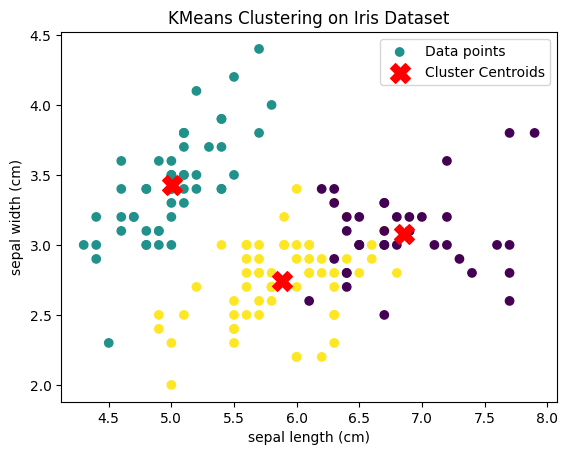

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualize the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, cmap='viridis', label='Data points')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centroids')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('KMeans Clustering on Iris Dataset')
plt.legend()
plt.show()


B) Hierarchical Clustering
Description of Hierarchical Clustering:
Hierarchical clustering creates a tree-like structure called a dendrogram, which shows how each data point is linked to others. It works by either successively merging smaller clusters into larger ones (agglomerative method) or splitting larger clusters into smaller ones (divisive method).

Why Hierarchical Clustering might be suitable for the Iris dataset:
Hierarchical clustering doesn’t require a predefined number of clusters. Given that the Iris dataset has three natural groupings (species of flowers), hierarchical clustering can reveal these groupings without knowing the exact number beforehand.

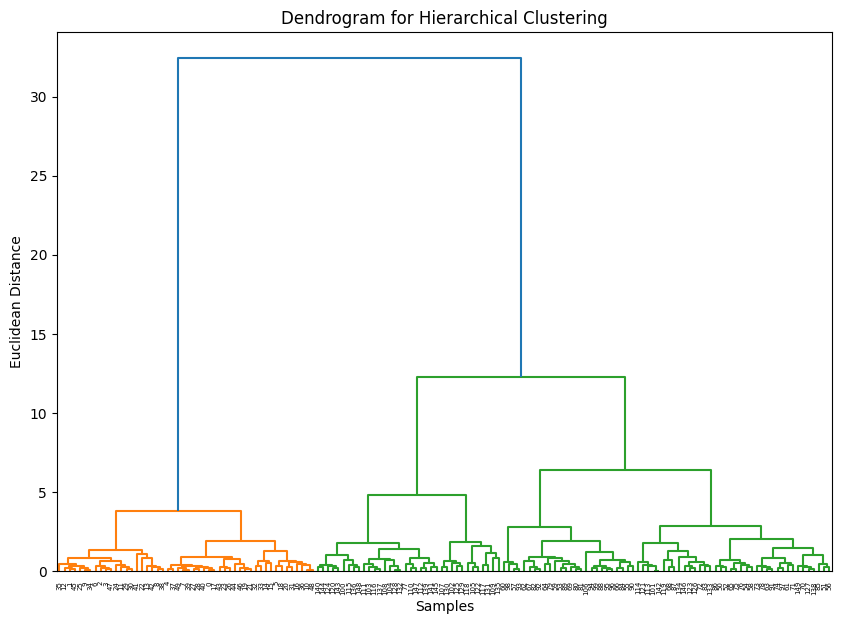

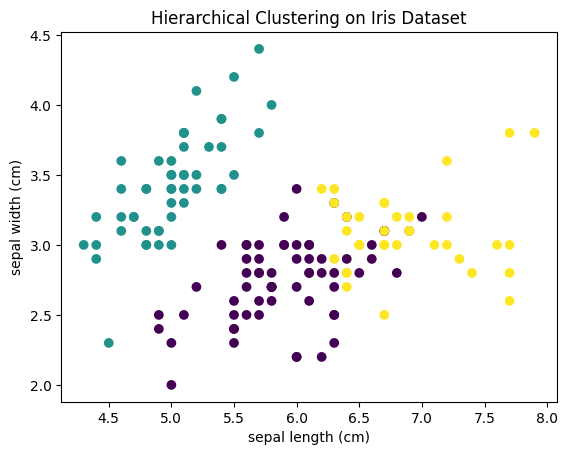

In [3]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Apply Agglomerative Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X)

# Create a dendrogram
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

# Visualize the clusters
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=hierarchical_labels, cmap='viridis')
plt.title('Hierarchical Clustering on Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()
